In [67]:
# Importando a biblioteca do pandas, onde iremos ler, tratar o nossa datasheet.
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [63]:
# Força o panda não omitir nenhuma coluna.
# Força o panda não omitir nenhuma linha.
# Obs: para obter o maximo de linha e colunas que o datasheet tem utilizamos a função SHAPE do pandas.
pd.set_option('display.max_columns', 11)
pd.set_option('display.max_rows', 1000)

In [68]:
# Lendo o arquivo cvs que está inserido no drive.
df_path = '/content/drive/MyDrive/SistemasInteligentes/dataset/'
df_name = 'vgsales.csv'

df = pd.read_csv(df_path + df_name)
df.index = np.arange(1, len(df)+1)

df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [65]:
df = df.rename_axis('ID').reset_index()

df.head()

,ID,Rank,Name,Platform,Year,...,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,1,Wii Sports,Wii,2006.0,...,41.49,29.02,3.77,8.46,82.74
1,1,2,Super Mario Bros.,NES,1985.0,...,29.08,3.58,6.81,0.77,40.24
2,2,3,Mario Kart Wii,Wii,2008.0,...,15.85,12.88,3.79,3.31,35.82
3,3,4,Wii Sports Resort,Wii,2009.0,...,15.75,11.01,3.28,2.96,33.00
4,4,5,Pokemon Red/Pokemon Blue,GB,1996.0,...,11.27,8.89,10.22,1.00,31.37


In [1]:
# Imprimindo as 5 primeiras linhas do nosso datasheet, aceitando como parâmetro o total de linha que eu quero imprimir.
# Ex: df.head(1000)
df.head()

NameError: ignored

In [ ]:
# Excluindo features irrelevantes, ou seja, excluindo uma coluna.
# Usamos o axis para excluir uma coluna e não uma linha.
# O inplace é usado para garantir a alteração desse dataset, ou a remoção que estamos fazendo, sem ele não seria efetivado.
df.drop('Name', axis = 1, inplace = True)
df.drop('Platform', axis = 1, inplace = True)
df.drop('Genre', axis = 1, inplace = True)
df.drop('Publisher', axis = 1, inplace = True)

In [ ]:
# Mostra que realmente não existe nenhuma coluna com o nome NAME, PLATFORM, GENRE, PUBLISHER.
df.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Mostra o total de linha e colunas do datasheet.
df.shape

(16598, 7)

In [ ]:
# Mostra os tipos de dados de cada coluna.
# Vemos que a coluna ANO está em FLOAT, e iremos mudar ela para INT.
# Mas existe algumas linhas que está faltando dados, ou seja, tem dados com caracteristicas com N/A.
# Então antes de converter para INT iremos subistituir esses valores pela média e mediana.
print(df.dtypes)

Rank              int64
Year            float64
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [ ]:
# Pega todas as linhas que não possuirem NaN no nosso dataset
data_without_nan = df.dropna()
print(data_without_nan.shape)

(16327, 7)


In [ ]:
def getMissingInfo():
    # Soma o total de dados faltantes, pega todos os dados que forem nulos e soma em uma única varivel que é a MISSING.
    missing = df.isnull().sum()
    print(missing)
    # Porcentagem de dados faltantes
    # O termo LEN é basicamente o tamanho de uma coluna, que no caso a coluna que foi determinada foi a coluna Name.
    # Porém pode-se usar qualquer coluna no lugar de NAME do dataset, pois que o python ira fazer todo o trabalho de calcular as porcentagens.
    missing_percent = (missing / len ( df['Global_Sales'] ) ) * 100
    print(missing_percent)
   

In [ ]:
  # Utiliza a função que foi criada acima.
  getMissingInfo()

Rank              0
Year            271
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Rank            0.000000
Year            1.632727
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64


In [ ]:
# Subistitui os dados faltantes da coluna pela Mediana.
df['Year'] = df['Year'].fillna( df['Year'].median())

getMissingInfo()

Rank            0
Year            0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Rank            0.0
Year            0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64


In [ ]:
# Subistitui os dados faltantes da coluna pela Média.
df['Year'] = df['Year'].fillna( df['Year'].mean())
getMissingInfo()

Rank            0
Year            0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Rank            0.0
Year            0.0
NA_Sales        0.0
EU_Sales        0.0
JP_Sales        0.0
Other_Sales     0.0
Global_Sales    0.0
dtype: float64


In [ ]:
# Então aqui fizemos a conversão do Ano de FLOAT para INT e mostramos em seguida que está convertido.
df['Year'] = df['Year'].astype(int)

print(df.dtypes)

Rank              int64
Year              int64
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [ ]:
# Mostra a correlação utilizando o método de PEARSON.
df.corr(method = 'pearson')

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.177526,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.177526,1.000000,-0.091282,0.005824,-0.169432,0.040857,-0.074807
NA_Sales,-0.401362,-0.091282,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.005824,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169432,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.040857,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074807,0.941047,0.902836,0.611816,0.748331,1.000000


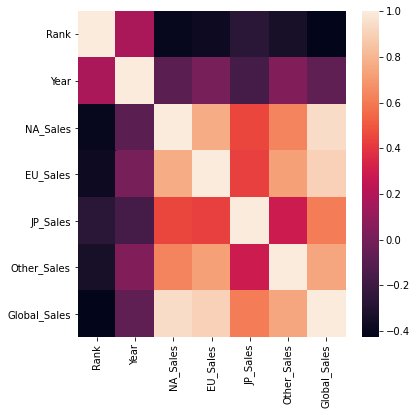

In [ ]:
# Cria uma figura de retangulo de um tamanho 6x6.
plt.figure(figsize = (6, 6))

# Utiliza o seaborn para fazer uma figurinha de calor utilizando o retangulo acima.
sb.heatmap(df.corr(method = 'pearson'))

# Mostra a figura de calor.
plt.show();

In [ ]:
# Definindo as variaveis preditoriais e a variavel alvo.
# Ou também variavel Independente X e Dependente Y
y = df['Global_Sales']
x = df.drop('Global_Sales', axis = 1)

In [ ]:
# Funcão que reparte os dados em dados de treino e dados de teste
# test_size = 0.3 tamanho dos dados de teste = 30%
# random_state = garante a mesma aleatóridade de todos.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [ ]:
# Regressão Linear Simples
# Criando o modelo de machine learning utilizando a regressão Linear Simples.
modelLinear = LinearRegression()

# Alimentando o modelo com os dados de treinos x e y.
modelLinear.fit(x_train, y_train)

#-----------------------------------------------------------------------------#

# Regressão Ridge
# Criando o modelo de machine learning utilizando o modelo de regressão Ridge.
modelRidge = Ridge(alpha = 5)
# Alimentando o modelo com os dados de treinos x e y.
modelRidge.fit(x_train, y_train)


Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
# Coeficiente de determinação R2.
# O R-Quadrado é uma medida estatística de quão proximos os dados estão na linha de regressão ajustada.
# Também é conhecido como o coeficiente de determinação ou coeficiente de determinação multipla para a regressão multipla.

#-----------------------------------------------------------------------------#

# Resultado do modelo linear simples
result = modelLinear.score(x_test, y_test)
print(result)

#-----------------------------------------------------------------------------#

# Resultado do modelo Ridge
result = modelRidge.score(x_test, y_test)
print(result)

0.9999907092533417
0.9999889967872249
